In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.datasets import load_iris
import graphviz

In [65]:
df = pd.DataFrame(load_iris().data, columns=['1', '2', '3', '4'])
df.head()

,1,2,3,4
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [73]:
df_targ = pd.DataFrame(load_iris().target, columns=['0'])
iris_names = {0 : 'one', 1 : 'two', 2 : 'three'}
df_targ.replace(iris_names, inplace=True)
df_targ

,0
0,one
1,one
2,one
3,one
4,one
...,...
145,three
146,three
147,three
148,three


In [74]:
X = df
y = df_targ
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=42)

In [75]:
clf_model = DecisionTreeClassifier(criterion="gini", random_state=42, max_depth=3, min_samples_leaf=5)   

In [76]:
clf_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)

In [77]:
y_predict = clf_model.predict(X_test)

In [78]:
metrics.accuracy_score(y_test,y_predict)

0.9777777777777777

In [81]:
target = list(df_targ['0'].unique())
feature_names = list(X.columns)

In [82]:
dot_data = tree.export_graphviz(clf_model,feature_names=feature_names,class_names=target)  
graph = graphviz.Source(dot_data)

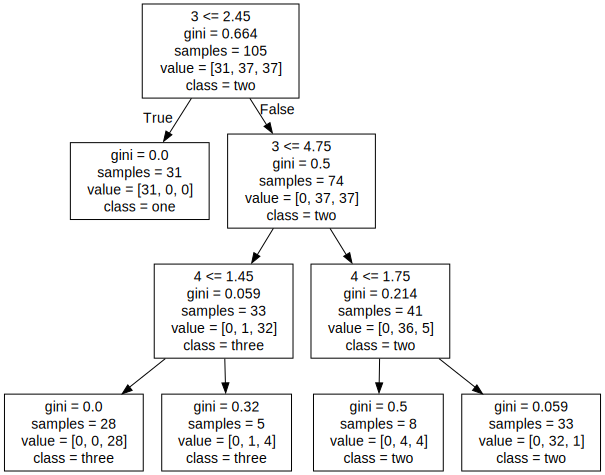

In [83]:
graph

In [84]:
importances = clf_model.feature_importances_

In [85]:
importances

array([0.        , 0.        , 0.94889308, 0.05110692])

In [86]:
sorted_importances = pd.DataFrame({'feature': list(X_train.columns),
                   'importance': clf_model.feature_importances_}).\
                    sort_values('importance', ascending = False)
sorted_importances

,feature,importance
2,3,0.948893
3,4,0.051107
0,1,0.000000
1,2,0.000000
